In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import keras
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from keras.models import Model , Sequential
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from glob import glob 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [3]:
#resize all images to this
image_size = [224,224]

training_path = "/content/drive/MyDrive/Datasets/Dataset/Train"
testing_path = "/content/drive/MyDrive/Datasets/Dataset/Test"

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=image_size+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [5]:
#Dont train existing weights

for layer in vgg19.layers:
  layer.trainable=False

In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#useful for getting number of op classes

folders = glob('/content/drive/MyDrive/Datasets/Dataset/Train/*')

In [11]:
folders

['/content/drive/MyDrive/Datasets/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Datasets/Dataset/Train/Uninfected']

In [14]:
x = Flatten()(vgg19.output)

In [15]:
prediction = Dense(len(folders),activation='softmax')(x)

In [16]:
#create model object
model = Model(inputs=vgg19.input,outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(training_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [48]:
training_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [38]:
test_set = test_datagen.flow_from_directory(testing_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [42]:
#Checkpoint
model_path = "/content/drive/MyDrive/Models/Maleria_Detection_Cnn.h5"
Checkpoints=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_lists= [Checkpoints]

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_lists
)

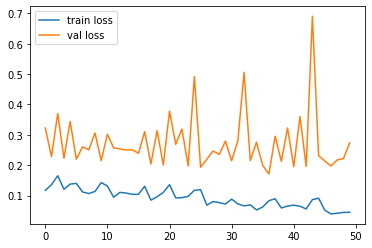

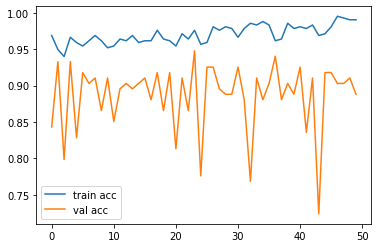

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##Model Import

In [45]:
model1_path = "/content/drive/MyDrive/Models/Maleria_Detection_Cnn.h5"

In [46]:
model1 = keras.models.load_model(model1_path)

###Preprocessing

In [49]:
#Parasite
p1 = '/content/drive/MyDrive/Datasets/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_9.png'
p2 = '/content/drive/MyDrive/Datasets/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png'
p3= '/content/drive/MyDrive/Datasets/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png'
p4 = '/content/drive/MyDrive/Datasets/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_20.png'
p5 = '/content/drive/MyDrive/Datasets/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_26.png'
#Uninfected
u1 = '/content/drive/MyDrive/Datasets/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_156.png'
u2 = '/content/drive/MyDrive/Datasets/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_57.png'
u3 = '/content/drive/MyDrive/Datasets/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_161.png'
u4 = '/content/drive/MyDrive/Datasets/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_168.png'
u5 ='/content/drive/MyDrive/Datasets/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_32.png'


In [50]:
def pred_maleria(maleria_images):
  test_image = image.load_img(maleria_images,target_size=(224,224))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image,axis=0)

  result=model1.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result,"------->>>>",pred)

  if pred==0:
    print("Predictes -->>Parasite")
  else:
    print("Predicted---->>>Uninfected")
    

In [51]:
for data in [p1,p2,p3,p4,p5,u1,u2,u3,u4,u5]:
  pred_maleria(data)

[[0.916 0.084]] ------->>>> 0
Predictes -->>Parasite
[[0.993 0.007]] ------->>>> 0
Predictes -->>Parasite
[[0.992 0.008]] ------->>>> 0
Predictes -->>Parasite
[[0.994 0.006]] ------->>>> 0
Predictes -->>Parasite
[[0.906 0.094]] ------->>>> 0
Predictes -->>Parasite
[[0.484 0.516]] ------->>>> 1
Predicted---->>>Uninfected
[[0.066 0.934]] ------->>>> 1
Predicted---->>>Uninfected
[[0.254 0.746]] ------->>>> 1
Predicted---->>>Uninfected
[[0.179 0.821]] ------->>>> 1
Predicted---->>>Uninfected
[[0.382 0.618]] ------->>>> 1
Predicted---->>>Uninfected
